<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Lab 13: Face Detection
The code below uses some fancy javascript to get an image from the webcam on your local machine and send it to the notebook running in Colab, where it can convert it to an image accessible in Python code.

We will experiment with using Viola-Jones Haar Cascade models for face detection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [2]:
# Download the Haar Cascade face detection model
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
!curl -o haarcascade_frontalface_default.xml {url}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  4147k      0 --:--:-- --:--:-- --:--:-- 4147k


In [3]:
# Adapted from: https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=09b_0FAnUa9y
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [4]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  # get OpenCV format image
  img = js_to_image(data) 
  return img

## Make sure webcam is working

<IPython.core.display.Javascript object>

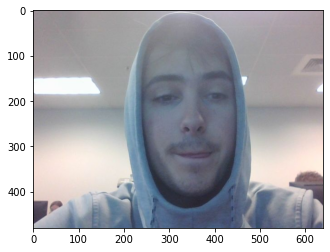

In [ ]:
# Take a picture from the web cam and display it
img = take_photo()
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

## Face detection

<IPython.core.display.Javascript object>

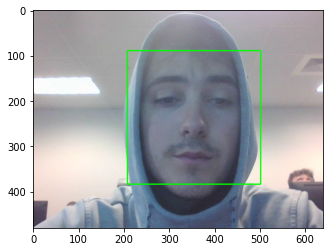

In [ ]:
# Detect faces

# Take a picture from the webcam
img = take_photo()

# Make a copy of the image to draw on
disp = img.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes = face_cascade.detectMultiScale(gray)

# loop over each detection (bounding box)
for (x, y, w, h) in bounding_boxes:
    # draw the bounding box on the display image
    disp = cv2.rectangle(disp, (x, y), (x+w, y+h), (0, 255, 0), 2)

disp = cv2.cvtColor(disp, cv2.COLOR_BGR2RGB)
plt.imshow(disp)
plt.show()

## TODO: Experiment with failure cases
Copy/paste the code to capture an image and run face detection 4 times.

<IPython.core.display.Javascript object>

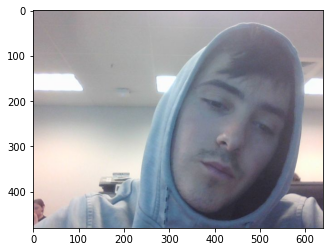

In [ ]:
# TODO: Find and display 4 examples of failure cases for Haar Cascade face
# detection. A failure case is when a face is not successfully detected. For
# example, you might try changes in object pose (translation, rotation, scale,
# expression), occlusion, and intra-class appearance (different people’s faces).

# Detect faces

# Take a picture from the webcam
img2 = take_photo()

# Make a copy of the image to draw on
disp2 = img2.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade2 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes2 = face_cascade2.detectMultiScale(gray2)

# loop over each detection (bounding box)
for (x2, y2, w2, h2) in bounding_boxes2:
    # draw the bounding box on the display image
    disp2 = cv2.rectangle(disp2, (x2, y2), (x2+w2, y2+h2), (0, 255, 0), 2)

disp2 = cv2.cvtColor(disp2, cv2.COLOR_BGR2RGB)
plt.imshow(disp2)
plt.show()

<IPython.core.display.Javascript object>

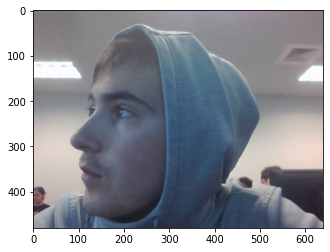

In [ ]:
# Take a picture from the webcam
img3 = take_photo()

# Make a copy of the image to draw on
disp3 = img3.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade3 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes3 = face_cascade3.detectMultiScale(gray3)

# loop over each detection (bounding box)
for (x3, y3, w3, h3) in bounding_boxes3:
    # draw the bounding box on the display image
    disp3 = cv2.rectangle(disp3, (x3, y3), (x3+w3, y3+h3), (0, 255, 0), 2)

disp3 = cv2.cvtColor(disp3, cv2.COLOR_BGR2RGB)
plt.imshow(disp3)
plt.show()

<IPython.core.display.Javascript object>

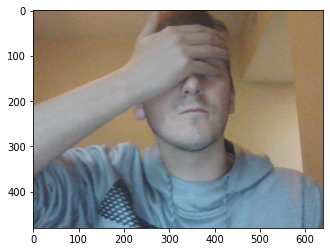

In [9]:
# Take a picture from the webcam
img4 = take_photo()

# Make a copy of the image to draw on
disp4 = img4.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade4 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes4 = face_cascade4.detectMultiScale(gray4)

# loop over each detection (bounding box)
for (x4, y4, w4, h4) in bounding_boxes4:
    # draw the bounding box on the display image
    disp4 = cv2.rectangle(disp4, (x4, y4), (x4+w4, y4+h4), (0, 255, 0), 2)

disp4 = cv2.cvtColor(disp4, cv2.COLOR_BGR2RGB)
plt.imshow(disp4)
plt.show()

<IPython.core.display.Javascript object>

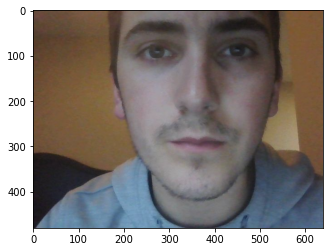

In [11]:
# Take a picture from the webcam
img5 = take_photo()

# Make a copy of the image to draw on
disp5 = img5.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade5 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes5 = face_cascade5.detectMultiScale(gray5)

# loop over each detection (bounding box)
for (x5, y5, w5, h5) in bounding_boxes5:
    # draw the bounding box on the display image
    disp5 = cv2.rectangle(disp5, (x5, y5), (x5+w5, y5+h5), (0, 255, 0), 2)

disp5 = cv2.cvtColor(disp5, cv2.COLOR_BGR2RGB)
plt.imshow(disp5)
plt.show()

## TODO: Answer this question based on your experiments.
### To what extent is the Viola-Jones detector robust to changes in object pose (translation, rotation, scale, expression), occlusion, and intra-class appearance (different people’s faces)?

Viola-Jones detector is not robust to changes in rotation, scale, expression, and occlusion after the cases I have provided. When I rotated my pose it did not detect. When I changed my expression by looking away it did not detect. When I covered my eyes or used occlusion, it did not detect. When I went closer to the camera, or increased the scale, it did not detect. 


## TODO: Implement face swapping

<IPython.core.display.Javascript object>

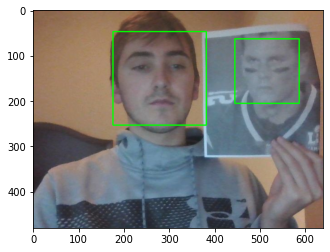

In [15]:
# To do: assuming that an image has two faces in it, write code to
# swap the faces (first resizing each face to be the right size). You might ask
# a neighbor to lean into the frame for this part, or you could hold your phone
# with a face on it in the frame. Or, you might be surprised that a hand-drawn
# face on a piece of paper could be detected.

img6 = take_photo()

# Make a copy of the image to draw on
disp6 = img6.copy()

# Make a grayscale version for detection (the model was trained on gray images)
gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

# initialize the Haar Cascade face detection model
face_cascade6 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Run detection
# bounding_boxes is a list of 4-element tuples, e.g., [(x, y, w, h)]
bounding_boxes6 = face_cascade6.detectMultiScale(gray6)

# loop over each detection (bounding box)
for (x6, y6, w6, h6) in bounding_boxes6:
    # draw the bounding box on the display image
    disp6 = cv2.rectangle(disp6, (x6, y6), (x6+w6, y6+h6), (0, 255, 0), 2)

disp6 = cv2.cvtColor(disp6, cv2.COLOR_BGR2RGB)
plt.imshow(disp6)
plt.show()

In [27]:
bounding_boxes6

array([[176,  47, 206, 206],
       [445,  63, 142, 142]], dtype=int32)

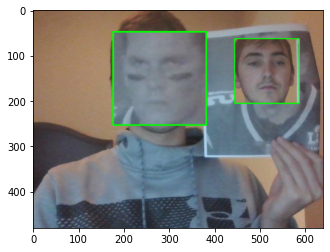

In [29]:
face1 = disp6[bounding_boxes6[0][1]:bounding_boxes6[0][1] + bounding_boxes6[0][3], bounding_boxes6[0][0]: bounding_boxes6[0][0] + bounding_boxes6[0][2]]
face2 = disp6[bounding_boxes6[1][1]:bounding_boxes6[1][1] + bounding_boxes6[1][3], bounding_boxes6[1][0]: bounding_boxes6[1][0] + bounding_boxes6[1][2]]
rows1, cols1 = face1.shape[:2]
rows2, cols2 = face2.shape[:2]
new_face1 = cv2.resize(face1, (cols2, rows2))
new_face2 = cv2.resize(face2, (cols1, rows1))
disp6[bounding_boxes6[0][1]:bounding_boxes6[0][1] + bounding_boxes6[0][3], bounding_boxes6[0][0]: bounding_boxes6[0][0] + bounding_boxes6[0][2]] = new_face2
disp6[bounding_boxes6[1][1]:bounding_boxes6[1][1] + bounding_boxes6[1][3], bounding_boxes6[1][0]: bounding_boxes6[1][0] + bounding_boxes6[1][2]] = new_face1
plt.imshow(disp6)
plt.show()

## Challenge: Green Face
1. Assume that the center pixel in a detected face is a good match for the face's overall skin color. Make a mask to threshold skin pixels in a range centered on this value. (It might be helpful to convert to some other color space.) Then tint the skin pixels green.
2. Blur the background.

## Challenge: Blur Background
Blur the background while keeping any detected face(s) unblurred. Try making a copy of the face region, blurring the entire image, then putting the copy back on top of the blurred image.

## Challenge: Experiment with other models
Go to https://github.com/opencv/opencv/tree/master/data/haarcascades and download another model, e.g., haarcascade_eye.xml. (Click on "raw" to get a download url for the file.) Then update the link in the code snip below to download the model file. Run this new model on a new image from the webcam and display results.


In [ ]:
# TODO: update URL to point to a new model
# Download the Haar Cascade detection model
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
!curl -o haarcascade_frontalface_default.xml {url}


In [ ]:
# TODO: experiment with a different Haar Cascade model.
